# Technical Indicators are the basis of determining whether or not an ALGO should trade based on the information available
 Comprehensive list of what we may test include:
 1. Simple Moving Average (Fast and Slow)
 2. Average True Range
 3. SAverage directional Index (Fast and Slow)
 4. Stochastic Oscillators (Fast and Slow)
 5. Relative Strength Index (Fast and Slow)
 6. Moving Average Convergence Divergence
 7. Bollinger Bands
 8. Rate of Change

# We're going to Try to use TA Lib - 
 conda install -c conda-forge ta-lib
 1. Simple Moving Average - SMA
 2. Exponential Moving Average - EMA
 3. Average directional Movement Index (Momentum Indicator) - ADX
 4. Bollinger Bands - BBANDS
 5. Relative Strength Index - RSI



In [4]:
#Import necessary libraries, and information
import yfinance as yf
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Datapull of information based on pull from yfinance (testing dataset)
power = yf.Ticker("POWERGRID.NS")
df = power.history(start="2020-01-01", end='2021-09-04')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01,126.697857,130.255101,126.498380,129.989136,10215280,0.0,0.0
2020-01-02,130.022377,130.787022,129.224496,129.723175,4255269,0.0,0.0
2020-01-03,129.157991,129.523694,127.163273,128.326859,5518701,0.0,0.0
2020-01-06,127.661949,128.958524,125.002326,128.393356,5516467,0.0,0.0
2020-01-07,128.426610,129.324230,127.096798,127.462502,10517784,0.0,0.0


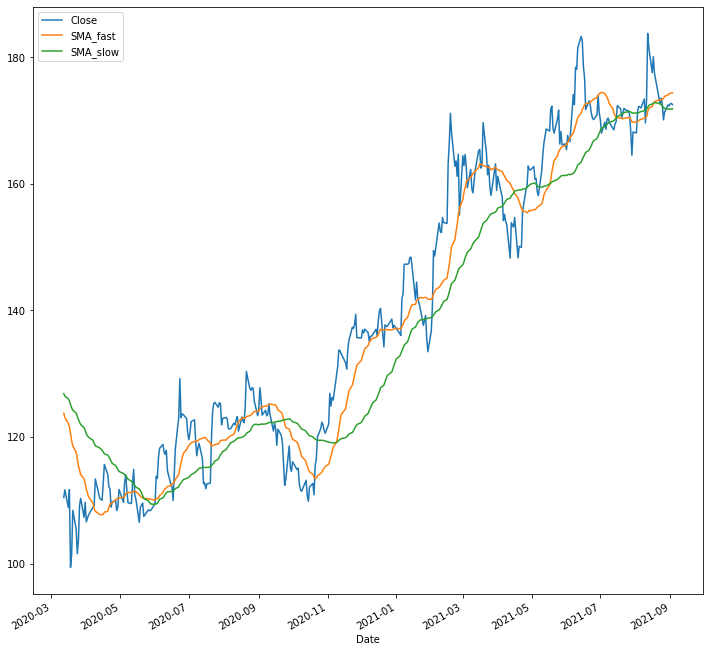

In [6]:
#1. Simple moving Average (SMA) - calculates the average of a selected range of closing prices, by the number of periods in that range
# Set the short window and long window
fast_window_SMA = 20
slow_window_SMA = 50

# Generate the fast and slow simple moving averages 
df['SMA_fast'] = ta.SMA(df['Close'],fast_window_SMA)
df['SMA_slow'] = ta.SMA(df['Close'],slow_window_SMA)

# Drop all NaN values from the DataFrame
df = df.dropna()

# Utilize the differential between the Fast/Slow to ID when to signal
df['SMA_Signal_differential'] = df['SMA_fast'] - df['SMA_slow'] 

# Initialize the new Signal column
df['SMA_Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
df.loc[(df['SMA_Signal_differential'] >= 0), 'SMA_Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
df.loc[(df['SMA_Signal_differential'] < 0), 'SMA_Signal'] = -1

#Ploting the Data
df[['Close','SMA_fast','SMA_slow']].plot(figsize=(12,12))
plt.show()

In [8]:
#Testing the Data Frame to verify the pull and calculation of information
df.tail(20)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_fast,SMA_slow,SMA_Signal_differential,SMA_Signal
Date,,,,,,,,,,,
2021-08-06,172.456646,173.439305,171.523123,171.965317,4005234,0.0,0.0,170.173837,171.402049,-1.228211,-1.0
2021-08-09,173.930633,173.930633,171.031792,173.390167,12311254,0.0,0.0,170.358698,171.546744,-1.188047,-1.0
2021-08-10,173.046255,173.046255,168.378625,169.606949,8943948,0.0,0.0,170.400459,171.612827,-1.212369,-1.0
2021-08-11,169.950866,173.930638,169.557809,173.291916,23459974,0.0,0.0,170.639365,171.771034,-1.131669,-1.0
2021-08-12,173.930643,184.445091,173.242784,183.757233,43580817,0.0,0.0,171.353634,172.093591,-0.739957,-1.0
2021-08-13,181.005784,184.052033,180.416198,181.546249,20082633,0.0,0.0,171.940771,172.388880,-0.448109,-1.0
2021-08-16,180.809260,181.104061,177.271682,177.566483,15981492,0.0,0.0,172.201788,172.606783,-0.404996,-1.0
2021-08-17,177.910419,180.563595,177.861283,180.072266,11971845,0.0,0.0,172.613888,172.725930,-0.112042,-1.0
2021-08-18,180.514450,182.774568,177.026007,177.468216,18920646,0.0,0.0,172.963959,172.825424,0.138535,1.0


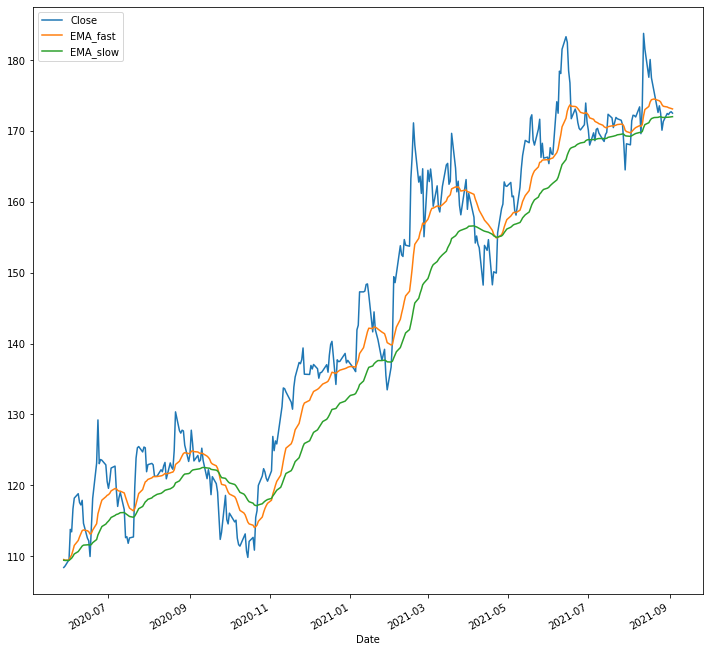

In [9]:
#2. Exponential Moving Average (EMA) - moving average that places a greater weight and significance on the most recent data

# Set the short window and long window
fast_window_EMA = 20
slow_window_EMA = 50

# Generate the fast and slow exponential moving averages 
df['EMA_fast'] = ta.EMA(df['Close'], timeperiod = fast_window_EMA)
df['EMA_slow'] = ta.EMA(df['Close'], timeperiod = slow_window_EMA)

# Drop all NaN values from the DataFrame
df = df.dropna()

# Utilize the differential between the Fast/Slow to ID when to signal
df['EMA_Signal_differential'] = df['EMA_fast'] - df['EMA_slow'] 

# Initialize the new Signal column
df['EMA_Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
df.loc[(df['EMA_Signal_differential'] >= 0), 'EMA_Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
df.loc[(df['EMA_Signal_differential'] < 0), 'EMA_Signal'] = -1

df[['Close','EMA_fast','EMA_slow']].plot(figsize=(12,12))
plt.show()

In [11]:
#Testing the Data Frame to verify the pull and calculation of information
df.tail(20)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_fast,SMA_slow,SMA_Signal_differential,SMA_Signal,EMA_fast,EMA_slow,EMA_Signal_differential,EMA_Signal
Date,,,,,,,,,,,,,,,
2021-08-06,172.456646,173.439305,171.523123,171.965317,4005234,0.0,0.0,170.173837,171.402049,-1.228211,-1.0,170.463230,169.632416,0.830815,1.0
2021-08-09,173.930633,173.930633,171.031792,173.390167,12311254,0.0,0.0,170.358698,171.546744,-1.188047,-1.0,170.741986,169.779779,0.962208,1.0
2021-08-10,173.046255,173.046255,168.378625,169.606949,8943948,0.0,0.0,170.400459,171.612827,-1.212369,-1.0,170.633888,169.773001,0.860887,1.0
2021-08-11,169.950866,173.930638,169.557809,173.291916,23459974,0.0,0.0,170.639365,171.771034,-1.131669,-1.0,170.887033,169.910998,0.976035,1.0
2021-08-12,173.930643,184.445091,173.242784,183.757233,43580817,0.0,0.0,171.353634,172.093591,-0.739957,-1.0,172.112766,170.453987,1.658779,1.0
2021-08-13,181.005784,184.052033,180.416198,181.546249,20082633,0.0,0.0,171.940771,172.388880,-0.448109,-1.0,173.011193,170.888978,2.122215,1.0
2021-08-16,180.809260,181.104061,177.271682,177.566483,15981492,0.0,0.0,172.201788,172.606783,-0.404996,-1.0,173.445030,171.150841,2.294190,1.0
2021-08-17,177.910419,180.563595,177.861283,180.072266,11971845,0.0,0.0,172.613888,172.725930,-0.112042,-1.0,174.076196,171.500701,2.575495,1.0
2021-08-18,180.514450,182.774568,177.026007,177.468216,18920646,0.0,0.0,172.963959,172.825424,0.138535,1.0,174.399245,171.734721,2.664524,1.0


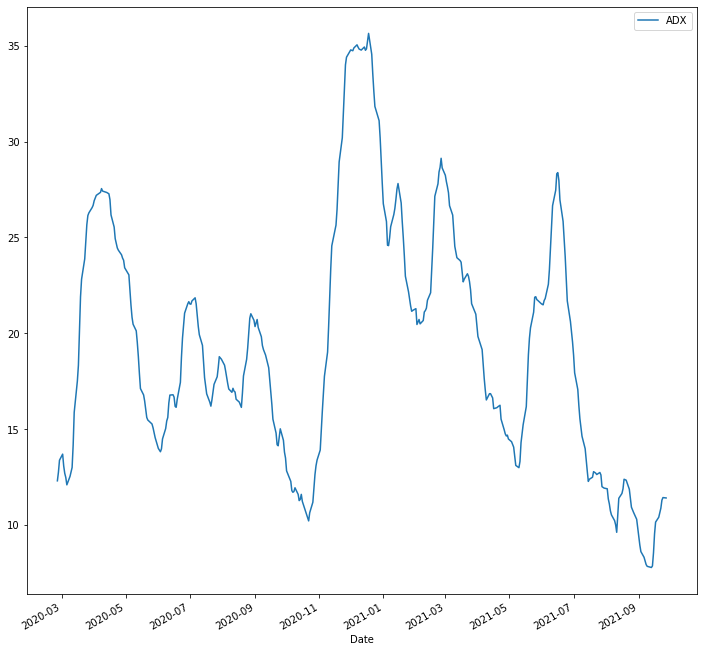

In [6]:
#3. Average Directional movement Index (Momentum Indicator) (ADX) - used to measure the overall strength of a trend, usually an average of expanding price range values
df['ADX'] = ta.ADX(df['High'],df['Low'], df['Close'], timeperiod=20)
df[['ADX']].plot(figsize=(12,12))
plt.show()

# ADX Indicators
---
# ADX Values | Trend Strength 
# 0  - 25    | Absent or Weak Trend
# 25 - 50    | Strong Trend
# 50 - 75    | Very Strong Trend
# 75 - 100   | Extremely Strong Trend
---
# We want to trade base don the indicator values that are above 50 to buy, and then sell on the items that are below 50

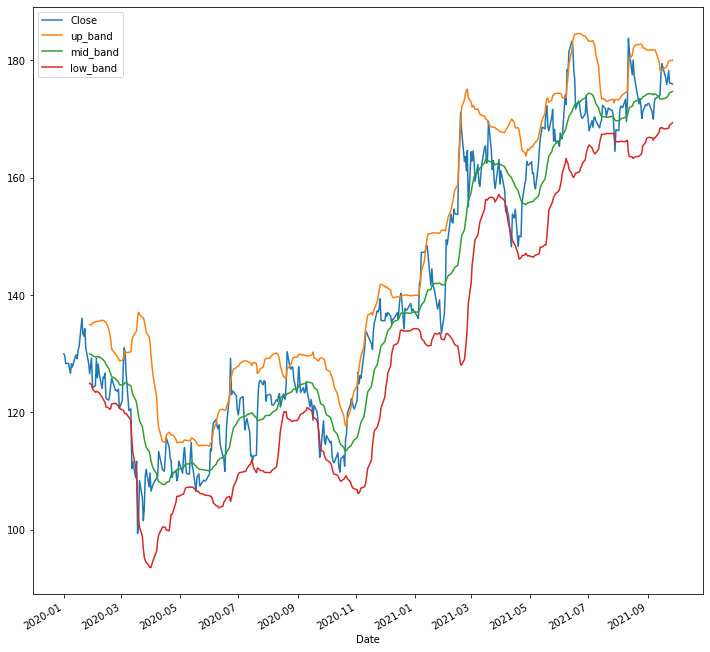

In [7]:
#4. Bollinger Bands (BBANDS) - statistical analysis of prices and volatility over time using the formula understood by Bollinger
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','up_band','mid_band','low_band']].plot(figsize = (12,12))
plt.show()

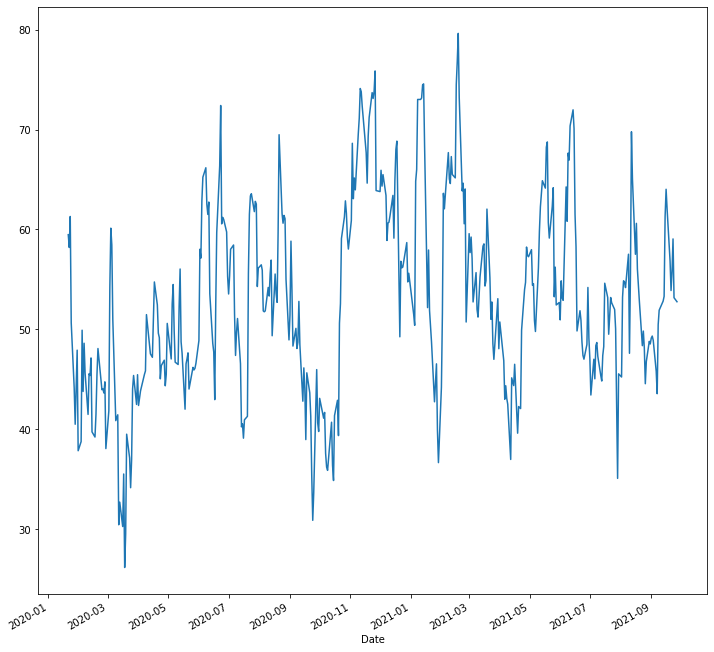

In [8]:
#5. Relative Strength Index RSI  - intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period
df['Relative'] = ta.RSI(df['Close'],14)
df['Relative'].plot(figsize=(12,12))
plt.show()

In [9]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,SMA_fast,SMA_slow,EMA,ADX,up_band,mid_band,low_band,Relative
Date,,,,,,,,,,,,,,,,
2021-09-21,176.050003,178.399994,175.449997,175.899994,7110756,0.0,0.0,173.723905,173.723905,172.855226,174.818376,10.635272,179.038478,173.723905,168.409333,53.887976
2021-09-22,175.800003,177.449997,175.800003,176.750000,6874226,0.0,0.0,173.884526,173.884526,172.996366,175.002340,10.865127,179.358646,173.884526,168.410406,55.810088
2021-09-23,177.000000,178.750000,177.000000,178.250000,7721935,0.0,0.0,174.174194,174.174194,173.185932,175.311641,11.283849,179.921721,174.174194,168.426667,59.053728
2021-09-24,178.300003,179.500000,175.800003,176.149994,5320059,0.0,0.0,174.476779,174.476779,173.338656,175.391484,11.419811,179.965493,174.476779,168.988065,53.169541
2021-09-27,176.500000,177.149994,175.100006,176.000000,3904101,0.0,0.0,174.710449,174.710449,173.469219,175.449438,11.399302,180.038384,174.710449,169.382515,52.765129
